<a href="https://colab.research.google.com/github/bryanMontoya/PDI/blob/main/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import skimage, PIL
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

Leer una imágen usando librería PILLOW.


628 354 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


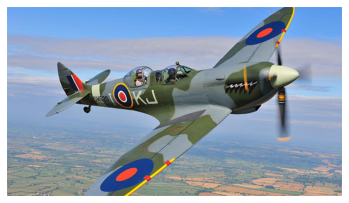

In [ ]:
% matplotlib inline
path = 'drive/MyDrive/PDI/Images/'
im = Image.open(path + 'spitfire.jpg')
print(im.width, im.height, im.mode, im.format, type(im))
plt.imshow(im)
plt.axis('off');

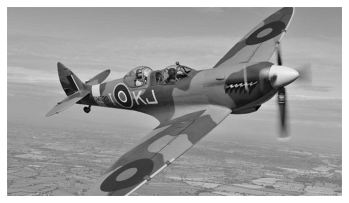

In [ ]:
im_g = im.convert('L')
im_g.save(path + 'avion_grises.jpeg')
im_g = Image.open(path + 'avion_grises.jpeg')
plt.imshow(im_g, cmap='gray')
plt.axis('off');

(1350, 2400, 3) uint8 <class 'numpy.ndarray'>


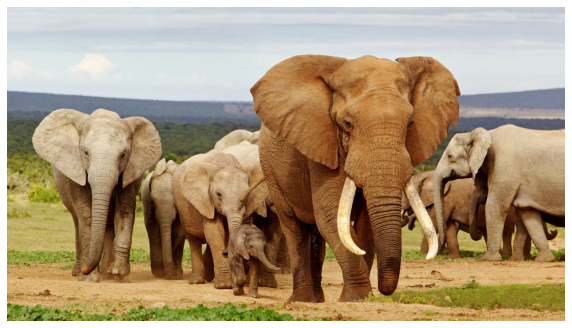

In [ ]:
import matplotlib.image as mpimg
im = mpimg.imread(path + 'elefantes.jpg')
print(im.shape, im.dtype, type(im))
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis('off');

Ahora se va a oscurecer un poco la imagen, para ello se colocará cada pixel menor a 0.5 a 0.

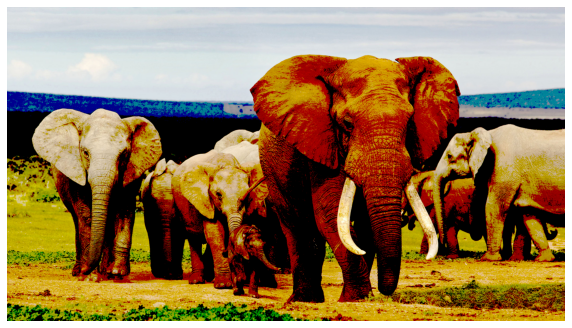

In [ ]:
im1 = np.array(Image.open(path + 'elefantes.jpg')) 
im1[im1<128] = 0
plt.figure(figsize = (10,7))
plt.imshow(im1)
plt.axis('off');
plt.tight_layout;
plt.savefig(path + 'elefantes_dark.png')


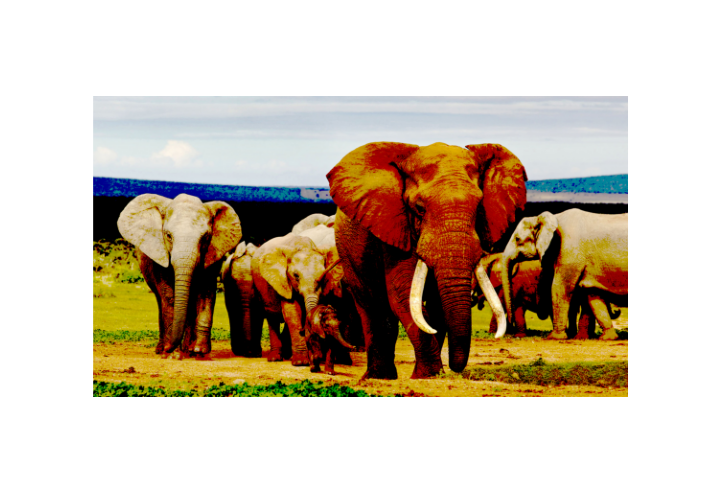

In [ ]:
im = mpimg.imread(path + 'elefantes_dark.png')
plt.figure(figsize = (10,7))
plt.imshow(im)
plt.axis('off')
plt.tight_layout();

La función **imshow** dentro de matplotlib utiliza diferentes métodos de interpolación para desplegar una imagen. Esta función es útil cuando la imagen que se va a graficar es pequeña. Ahora se va a tomar una imagen de $50 \times 50$ y se graficará usando las diferentes formas de interpolación.

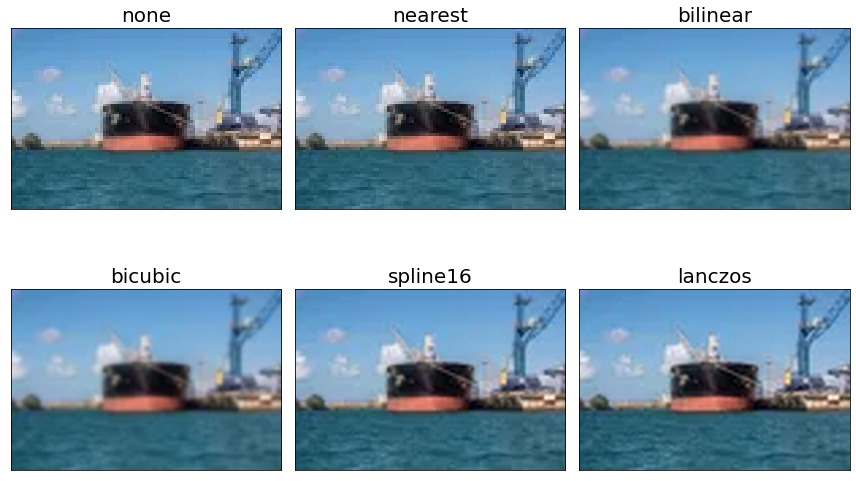

In [ ]:
im = mpimg.imread(path + 'barco.webp')
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12,8), subplot_kw = {'xticks':[], 'yticks':[]})
fig.subplots_adjust(hspace = 0.05, wspace = 0.05)
for ax,interp_method in zip(axes.flat, methods):
  ax.imshow(im, interpolation = interp_method)
  ax.set_title(str(interp_method),size = 20)
plt.tight_layout();

Ahora se va a trabajar usando **scikit-image**:

(354, 628, 3) uint8 <class 'numpy.ndarray'>


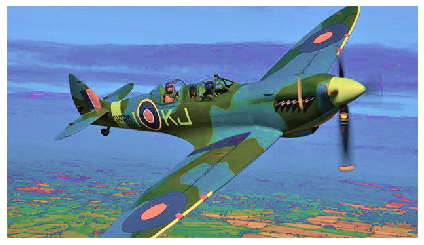

In [ ]:
from skimage import color, exposure, img_as_float, data, img_as_ubyte
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage

im = imread(path + 'spitfire.jpg')
print(im.shape, im.dtype, type(im))
hsv = color.rgb2hsv(im)
hsv[:,:,1] = 0.5 #Cambio de saturación.
im1 = color.hsv2rgb(hsv)
im1 = img_as_ubyte(im1)
imsave(path + 'avion_hsv.jpg', im1)
im = imread(path + 'avion_hsv.jpg')
plt.axis('off')
imshow(im)

Se va a trabajar con las imágenes predefinidas en el scikit-image.

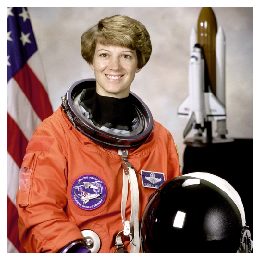

In [ ]:
im = data.astronaut()
imshow(im)
plt.axis('off');


Ahora se va a trabajar con el módulo misc de la librería **scipy**:

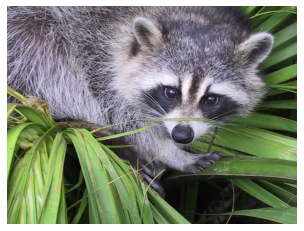

In [ ]:
from scipy.ndimage import affine_transform, zoom
from scipy import misc

im = misc.face()
imsave(path + 'face.png',im)
plt.imshow(im)
plt.axis('off');


Para leer una imagen desde una ubicació específica se puede usar la librería **imageio**:

<class 'imageio.core.util.Array'> (250, 250, 3) uint8


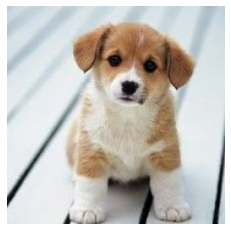

In [ ]:
import imageio
im = imageio.imread(path + 'perro.jpg')
print(type(im), im.shape, im.dtype)
plt.imshow(im)
plt.axis('off');

Convirtiendo una imagen de un formato a otro:

In [ ]:
im = Image.open(path + 'spitfire.jpg')
print(im.mode)
im.save(path + 'spitfire.png')

RGB


Para pasar una imagen de formato PNG del modo RGBA(rgb+alfa) a JPG implica que la imagen primero debe pasarse al modo RGB:

In [ ]:
im = Image.open(path + 'amazonas.png')
print(im.mode)
im.convert('RGB').save(path + 'amazonas.jpg')

RGBA


Convertir una imagen de un modo a otro:

In [ ]:
im = imread(path + 'amazonas.png', as_gray = True)
print(im.shape)

(168, 299)


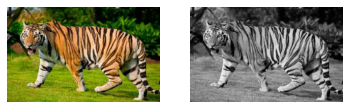

In [ ]:
im = imread(path + 'tigre.jpg')
im_g = color.rgb2gray(im)
plt.subplot(1,2,1), plt.imshow(im), plt.axis('off');
plt.subplot(1,2,2), plt.imshow(im_g, cmap = 'gray'), plt.axis('off');

Convirtiendo entre diferentes espacios de color:

<Figure size 432x288 with 0 Axes>

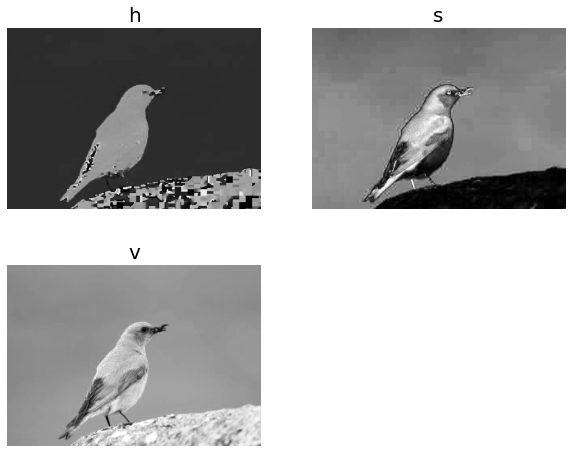

In [ ]:
im = imread(path + 'pajaro.jpg')
im_hsv = color.rgb2hsv(im)
plt.gray()
plt.figure(figsize = (10,8))
#Graficar cada una de las dimensiones de la imagen transformada.
plt.subplot(2,2,1), plt.imshow(im_hsv[:,:,0]), plt.title('h',size = 20), plt.axis('off');
plt.subplot(2,2,2), plt.imshow(im_hsv[:,:,1]), plt.title('s',size = 20), plt.axis('off');
plt.subplot(2,2,3), plt.imshow(im_hsv[:,:,2]), plt.title('v',size = 20), plt.axis('off');